In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow-io


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.0/28.0 MB 58.3 MB/s eta 0:00:00


In [ ]:
import os
from matplotlib import pyplot as plt
import pandas as pd
import tensorflow as tf 
import tensorflow_io as tfio
from glob import glob

In [ ]:
path = '/content/drive/MyDrive/Voice classifier'

In [ ]:
# selecting and observing one example

In [ ]:
def load_wav_16k_mono(filename):
    # Load encoded wav file
    file_contents = tf.io.read_file(filename)
    # Decode wav (tensors by channels) 
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    # Removes trailing axis
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Goes from 44100Hz to 16000hz - amplitude of the audio signal
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

In [ ]:
CAPUCHIN_FILE = os.path.join(path, 'Parsed_Capuchinbird_Clips', 'XC114131-0.wav')
NOT_CAPUCHIN_FILE = os.path.join(path, 'Parsed_Not_Capuchinbird_Clips', 'Crickets-chirping-0.wav')

In [ ]:
# Load encoded wav file
wave = tf.io.read_file(CAPUCHIN_FILE)
wave

<tf.Tensor: shape=(), dtype=string, numpy=b'RIFF$S\x07\x00WAVEfmt \x10\x00\x00\x00\x01\x00\x02\x00\x80\xbb\x00\x00\x00\xee\x02\x00\x04\x00\x10\x00data\x00S\x07\x00[\x00\x9c\xff\xb2\x00A\x00\x9b\x00\xfb\x00u\x00y\x01u\x00l\x01L\x00\xf7\x00\x1f\x00\xa7\x00;\x00\xba\x00P\x00\x03\x01L\x00]\x01\x91\x00\x96\x01\xfa\x00\x7f\x01,\x01C\x01:\x01\x1d\x01.\x01\xfe\x00\xe8\x00\x0b\x01\x89\x00o\x01@\x00\xca\x01"\x00\xb4\x01:\x00?\x01f\x00\xac\x00\x9a\x00T\x00\xe8\x00\x86\x00\t\x01\xff\x00\xd1\x00B\x01\x99\x002\x01]\x00\xd9\x00\xc3\xff6\x00>\xff\x8e\xffV\xffO\xff\xa6\xff\x8e\xff\xdb\xff\x19\x00,\x00\xa5\x00w\x00\xbd\x00c\x00\x1b\x00\x0f\x006\xff\xb4\xff\xb3\xfee\xff\x9f\xfeC\xff\xbf\xfe]\xff\x02\xff\x85\xff?\xff{\xff/\xffC\xff\xd4\xfe-\xffk\xfeM\xff7\xfeb\xff\\\xfeq\xff\xb4\xfe\x98\xff\xdb\xfe\x81\xff\xa0\xfe\t\xffC\xfe\xa1\xfe\x06\xfe\x7f\xfe\xe5\xfd\x81\xfe\x00\xfe\xae\xfe\x8b\xfe\x02\xff/\xffN\xffc\xffu\xff1\xffd\xff\xde\xfe+\xffw\xfe\x17\xff@\xfe5\xff\x92\xfeH\xffJ\xffJ\xff\xfb\xffF\xffg\x00/\xff

In [ ]:
# Decode wav (tensors by channels) 
wav, sample_rate = tf.audio.decode_wav(wave, desired_channels=1)
wav

<tf.Tensor: shape=(120000, 1), dtype=float32, numpy=
array([[ 0.0027771 ],
       [ 0.00543213],
       [ 0.00473022],
       ...,
       [-0.00341797],
       [-0.00366211],
       [-0.00689697]], dtype=float32)>

In [ ]:
sample_rate  # wave frequency Hzs

<tf.Tensor: shape=(), dtype=int32, numpy=48000>

In [ ]:
# Removes trailing axis   
wav = tf.squeeze(wav, axis=-1)
wav                      # earlier wav shape was (120000,1)  now  (120000,)

<tf.Tensor: shape=(120000,), dtype=float32, numpy=
array([ 0.0027771 ,  0.00543213,  0.00473022, ..., -0.00341797,
       -0.00366211, -0.00689697], dtype=float32)>

In [ ]:
sample_rate = tf.cast(sample_rate, dtype=tf.int64)
sample_rate

<tf.Tensor: shape=(), dtype=int64, numpy=48000>

In [ ]:
# Goes from 44100Hz to 16000hz - amplitude of the audio signal
wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)

In [ ]:
wav

<tf.Tensor: shape=(40000,), dtype=float32, numpy=
array([-2.1452930e-08,  2.9903514e-08,  2.3691292e-08, ...,
        1.1810826e-02,  1.3428938e-02,  3.8246573e-03], dtype=float32)>

In [ ]:
nwave = load_wav_16k_mono(NOT_CAPUCHIN_FILE)
nwave

<tf.Tensor: shape=(52079,), dtype=float32, numpy=
array([ 0.        ,  0.        ,  0.        , ..., -0.00987338,
       -0.01129754,  0.00579073], dtype=float32)>

In [ ]:
# plot wave

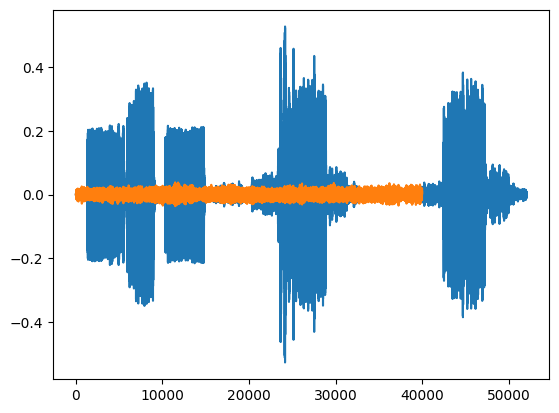

In [ ]:
plt.plot(nwave)
plt.plot(wav) #blue
# label = [nwave,wav]
# plt.legend(labels)
plt.show()

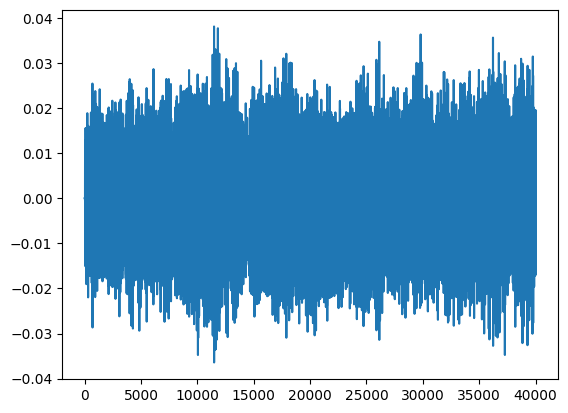

In [ ]:
plt.plot(wav) #blue
# label = ['nwave','wav']
# plt.legend(labels)
plt.show()

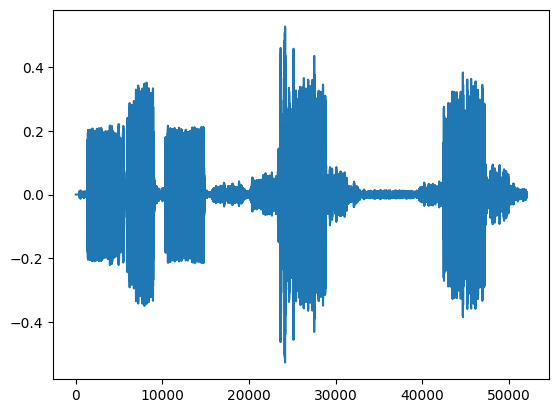

In [ ]:
plt.plot(nwave)
# plt.plot(wav #blue
# label = [nwave,wav]
# plt.legend(labels)
plt.show()

In [ ]:
# Create Tensorflow Dataset


In [ ]:
POS = os.path.join(path, 'Parsed_Capuchinbird_Clips')
NEG = os.path.join(path, 'Parsed_Not_Capuchinbird_Clips')

In [ ]:
# creating tensor flow data set
pos = tf.data.Dataset.list_files(POS+'/*.wav')
neg = tf.data.Dataset.list_files(NEG+'/*.wav')

In [ ]:
# Add labels and Combine Positive and Negative Samples

positives = tf.data.Dataset.zip((pos, tf.data.Dataset.from_tensor_slices(tf.ones(len(pos)))))
negatives = tf.data.Dataset.zip((neg, tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg)))))
data = positives.concatenate(negatives)

In [ ]:
data

<_ConcatenateDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

In [ ]:
pa ='/content/drive/MyDrive/Voice classifier'

In [ ]:
lengths = []
for file in os.listdir(os.path.join(path, 'Parsed_Capuchinbird_Clips')):
    tensor_wave = load_wav_16k_mono(os.path.join(path, 'Parsed_Capuchinbird_Clips', file))
    lengths.append(len(tensor_wave))

In [ ]:
# Determine Average Length of a Capuchin Call


In [ ]:
tf.math.reduce_mean(lengths)


<tf.Tensor: shape=(), dtype=int32, numpy=54156>

In [ ]:
tf.math.reduce_min(lengths)


<tf.Tensor: shape=(), dtype=int32, numpy=32000>

In [ ]:
tf.math.reduce_max(lengths)


<tf.Tensor: shape=(), dtype=int32, numpy=80000>

In [ ]:
# Build Preprocessing Function to Convert to Spectrogram


In [ ]:
def preprocess(file_path, label): 
    wav = load_wav_16k_mono(file_path)
    wav = wav[:48000]
    zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding, wav],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram, label

In [ ]:
# Test Out the Function and Viz the Spectrogram

In [ ]:
filepath, label = positives.shuffle(buffer_size=10000).as_numpy_iterator().next()

In [ ]:
spectrogram, label = preprocess(filepath, label)


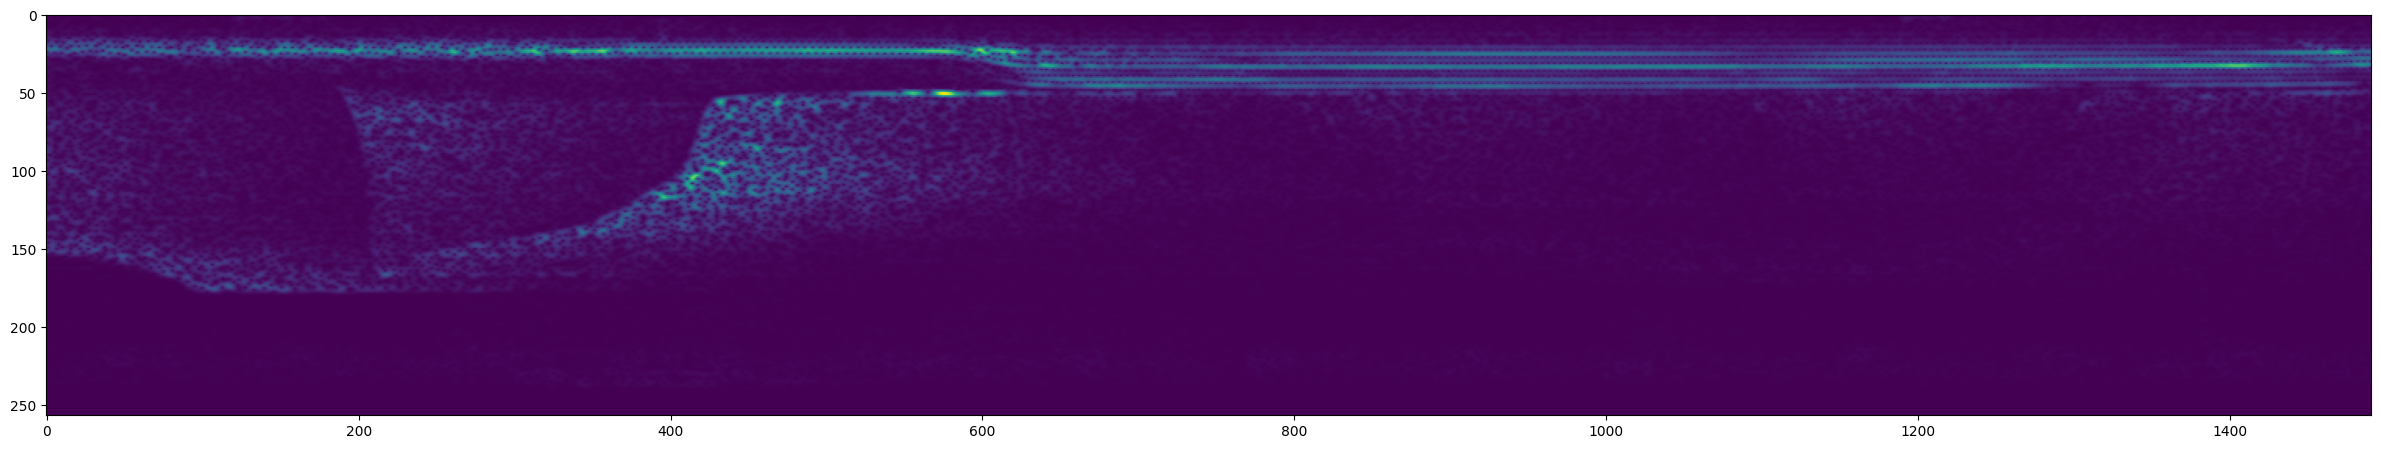

In [ ]:
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

In [ ]:
# Create Training and Testing Partitions

In [ ]:
# Create a Tensorflow Data Pipeline
data = data.map(preprocess)
data = data.cache()
data = data.shuffle(buffer_size=1000)
data = data.batch(16)
data = data.prefetch(8)

In [ ]:
#  Split into Training and Testing Partitions
train = data.take(36)
test = data.skip(36).take(15)


In [ ]:
# working on one batch

In [ ]:
samples, labels = train.as_numpy_iterator().next()


In [ ]:
samples.shape


(16, 1491, 257, 1)

In [ ]:
# Build Deep Learning Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten,MaxPooling2D

In [ ]:
# Build Sequential Model, Compile and View Summary

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3,3), activation='relu', input_shape=(1491, 257,1)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile('Adam', loss='BinaryCrossentropy', metrics=['acc'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 1489, 255, 64)     640       
                                                                 
 conv2d_21 (Conv2D)          (None, 1487, 253, 32)     18464     
                                                                 
 conv2d_22 (Conv2D)          (None, 1485, 251, 16)     4624      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 742, 125, 16)     0         
 2D)                                                             
                                                                 
 conv2d_23 (Conv2D)          (None, 740, 123, 32)      4640      
                                                                 
 conv2d_24 (Conv2D)          (None, 738, 121, 16)      4624      
                                                      

In [ ]:
hist = model.fit(train, epochs=25, validation_data=test)

Epoch 1/25
36/36 [==============================] - 25s 611ms/step - loss: 0.3135 - acc: 0.8906 - val_loss: 0.0362 - val_acc: 0.9957
Epoch 2/25
36/36 [==============================] - 21s 589ms/step - loss: 0.0459 - acc: 0.9826 - val_loss: 0.0425 - val_acc: 0.9915
Epoch 3/25
36/36 [==============================] - 20s 549ms/step - loss: 0.0379 - acc: 0.9931 - val_loss: 0.0026 - val_acc: 1.0000
Epoch 4/25
36/36 [==============================] - 20s 549ms/step - loss: 0.0437 - acc: 0.9878 - val_loss: 0.0647 - val_acc: 0.9829
Epoch 5/25
36/36 [==============================] - 20s 560ms/step - loss: 0.0484 - acc: 0.9861 - val_loss: 0.1252 - val_acc: 0.9872
Epoch 6/25
36/36 [==============================] - 20s 551ms/step - loss: 0.0418 - acc: 0.9913 - val_loss: 0.0029 - val_acc: 1.0000
Epoch 7/25
36/36 [==============================] - 20s 546ms/step - loss: 0.0049 - acc: 0.9965 - val_loss: 5.0413e-04 - val_acc: 1.0000
Epoch 8/25
36/36 [==============================] - 20s 546ms/ste

In [ ]:
r = pd.DataFrame(hist.history)
r['Epochs'] = hist.epoch
r.tail()

,loss,acc,val_loss,val_acc,Epochs
20,0.000036,1.0,0.000045,1.0,20
21,0.000024,1.0,0.000019,1.0,21
22,0.000035,1.0,0.000050,1.0,22
23,0.000030,1.0,0.000020,1.0,23
24,0.000034,1.0,0.000031,1.0,24


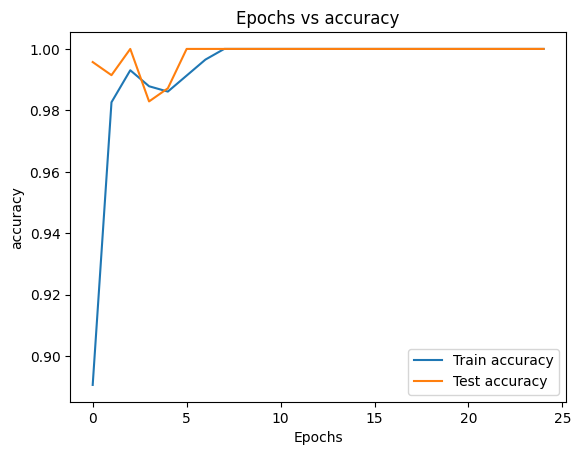

In [ ]:
plt.plot(r['Epochs'],r['acc'],label='Train accuracy')
plt.plot(r['Epochs'],r['val_acc'],label='Test accuracy')
plt.title('Epochs vs accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

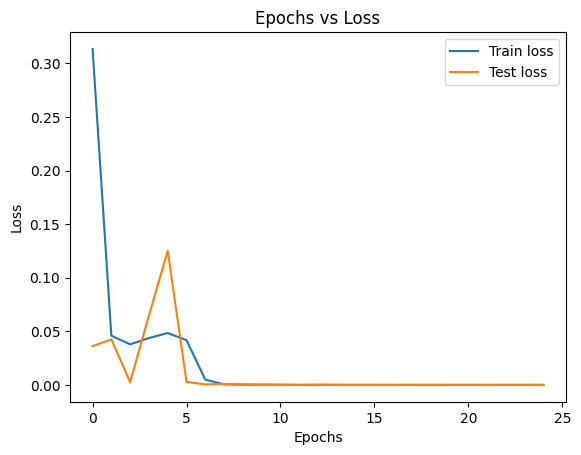

In [ ]:
plt.plot(r['Epochs'],r['loss'],label='Train loss')
plt.plot(r['Epochs'],r['val_loss'],label='Test loss')
plt.title('Epochs vs Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Make a Prediction on a Single Clip


In [ ]:
# Get One Batch and Make a Prediction

In [ ]:
X_test, y_test = test.as_numpy_iterator().next()
ypred = model.predict(X_test)

1/1 [==============================] - 0s 38ms/step


In [ ]:
ypred = [1 if prediction > 0.5 else 0 for prediction in ypred]


In [ ]:
ypred

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0]

In [ ]:
tf.math.reduce_sum(ypred)

<tf.Tensor: shape=(), dtype=int32, numpy=3>

In [ ]:
#  Build Forest Parsing Functions

In [ ]:
def load_mp3_16k_mono(filename):
    """ Load a WAV file, convert it to a float tensor, resample to 16 kHz single-channel audio. """
    res = tfio.audio.AudioIOTensor(filename)
    # Convert to tensor and combine channels 
    tensor = res.to_tensor()
    tensor = tf.math.reduce_sum(tensor, axis=1) / 2 
    # Extract sample rate and cast
    sample_rate = res.rate
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Resample to 16 kHz
    wav = tfio.audio.resample(tensor, rate_in=sample_rate, rate_out=16000)
    return wav

In [ ]:
mp3 = os.path.join( path, 'Forest Recordings', 'recording_00.mp3')

In [ ]:
wav = load_mp3_16k_mono(mp3)

In [ ]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)

In [ ]:
samples, index = audio_slices.as_numpy_iterator().next()


In [ ]:
#$ Build Function to Convert Clips into Windowed Spectrograms

def preprocess_mp3(sample, index):
    sample = sample[0]
    zero_padding = tf.zeros([48000] - tf.shape(sample), dtype=tf.float32)
    wav = tf.concat([zero_padding, sample],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram

In [ ]:
# Convert Longer Clips into Windows and Make Predictions
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)
audio_slices = audio_slices.map(preprocess_mp3)
audio_slices = audio_slices.batch(64)

In [ ]:
ypredf = model.predict(audio_slices)
ypredf = [1 if prediction > 0.5 else 0 for prediction in ypredf]

1/1 [==============================] - 3s 3s/step


In [ ]:
tf.math.reduce_sum(ypredf)

<tf.Tensor: shape=(), dtype=int32, numpy=8>

In [ ]:
from itertools import groupby
ypredf = [key for key, group in groupby(ypredf)]
calls = tf.math.reduce_sum(ypredf).numpy()
calls

5

In [ ]:
results = {}
for file in os.listdir(os.path.join(path, 'Forest Recordings')):
    FILEPATH = os.path.join(path,'Forest Recordings', file)
    
    wav = load_mp3_16k_mono(FILEPATH)
    audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)
    audio_slices = audio_slices.map(preprocess_mp3)
    audio_slices = audio_slices.batch(64)
    
    ypred = model.predict(audio_slices)
    
    results[file] = ypred

1/1 [==============================] - 1s 1s/step


In [ ]:
results

{'recording_02.mp3': array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 'recording_00.mp3': array([[5.53249890e-07],
        [1.41229020e-08],
        [5.65138103e-10],
        [9.99998331e-01],

In [ ]:
# Convert Predictions into Classes
class_preds = {}
for file, logits in results.items():
    class_preds[file] = [1 if prediction > 0.99 else 0 for prediction in logits]
class_preds

{'recording_02.mp3': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'recording_00.mp3': [0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'recording_01.mp3': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'recording_03.mp3': [0,
  0,
  0,
  

In [ ]:
# Group Consecutive Detections
postprocessed = {}
for file, scores in class_preds.items():
    postprocessed[file] = tf.math.reduce_sum([key for key, group in groupby(scores)]).numpy()
postprocessed

{'recording_02.mp3': 0,
 'recording_00.mp3': 5,
 'recording_01.mp3': 0,
 'recording_03.mp3': 0,
 'recording_04.mp3': 4,
 'recording_06.mp3': 5,
 'recording_08.mp3': 25,
 'recording_07.mp3': 2,
 'recording_05.mp3': 0,
 'recording_13.mp3': 0,
 'recording_12.mp3': 4,
 'recording_09.mp3': 0,
 'recording_15.mp3': 2,
 'recording_11.mp3': 3,
 'recording_14.mp3': 0,
 'recording_10.mp3': 5,
 'recording_22.mp3': 2,
 'recording_17.mp3': 3,
 'recording_20.mp3': 0,
 'recording_16.mp3': 5,
 'recording_21.mp3': 1,
 'recording_18.mp3': 6,
 'recording_19.mp3': 0,
 'recording_23.mp3': 5,
 'recording_27.mp3': 0,
 'recording_25.mp3': 0,
 'recording_24.mp3': 0,
 'recording_26.mp3': 2,
 'recording_34.mp3': 4,
 'recording_28.mp3': 4,
 'recording_29.mp3': 0,
 'recording_31.mp3': 1,
 'recording_30.mp3': 3,
 'recording_33.mp3': 0,
 'recording_32.mp3': 2,
 'recording_38.mp3': 1,
 'recording_39.mp3': 3,
 'recording_36.mp3': 1,
 'recording_35.mp3': 0,
 'recording_37.mp3': 3,
 'recording_43.mp3': 5,
 'recording_45.